# Librerias utilizadas

In [60]:
!pip install padasip

In [61]:
jupyter = False

In [62]:
if jupyter:
    import wget
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.linalg import toeplitz
from IPython.display import clear_output
from os import path
from scipy.ndimage.interpolation import shift
from matplotlib.mlab import psd

#import padasip as pa

# Descarga de datasets

In [63]:
# Collab
if not jupyter:
    !wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Contaminated_Data.mat?raw=true
    !wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/HEOG.mat?raw=true
    !wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Pure_Data.mat?raw=true
    !wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/VEOG.mat?raw=true
    clear_output()

# Jupyter
if jupyter:
    cont_data_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Contaminated_Data.mat?raw=true'
    if not path.exists('Contaminated_Data.mat'):
       cont_data_file = wget.download(cont_data_url)
    else:
       print('Already Downloaded File')
       cont_data_file = 'Contaminated_Data.mat'
    pure_data_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Pure_Data.mat?raw=true'
    if not path.exists('Pure_Data.mat'):
       pure_data_file = wget.download(pure_data_url)
    else:
       print('Already Downloaded File')
       pure_data_file = 'Pure_Data.mat'
    heog_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/HEOG.mat?raw=true'
    if not path.exists('HEOG.mat'):
       heog_file = wget.download(heog_url)
    else:
       print('Already Downloaded File')
       heog_file = 'HEOG.mat'
    veog_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/VEOG.mat?raw=true'
    if not path.exists('VEOG.mat'):
       veog_file = wget.download(veog_url)
    else:
       print('Already Downloaded File')
       veog_file = 'VEOG.mat'

# Visualizacion de datos

In [64]:
def RemoveKeys(dict_):
    new_dict = dict_.copy()
    new_dict.pop('__header__')
    new_dict.pop('__version__')
    new_dict.pop('__globals__')
    return  new_dict

def AddPlot(signal, n_rows, n_cols, index, title):
    plt.subplot(n_rows,n_cols,index)
    plt.title(title)
    plt.plot(signal)
    plt.grid(True)

## EEG pura

dict_keys(['sim1_resampled', 'sim2_resampled', 'sim3_resampled', 'sim4_resampled', 'sim5_resampled', 'sim6_resampled', 'sim7_resampled', 'sim8_resampled', 'sim9_resampled', 'sim10_resampled', 'sim11_resampled', 'sim12_resampled', 'sim13_resampled', 'sim14_resampled', 'sim15_resampled', 'sim16_resampled', 'sim17_resampled', 'sim18_resampled', 'sim19_resampled', 'sim20_resampled', 'sim21_resampled', 'sim22_resampled', 'sim23_resampled', 'sim24_resampled', 'sim25_resampled', 'sim26_resampled', 'sim27_resampled', 'sim28_resampled', 'sim29_resampled', 'sim30_resampled', 'sim31_resampled', 'sim32_resampled', 'sim33_resampled', 'sim34_resampled', 'sim35_resampled', 'sim36_resampled', 'sim37_resampled', 'sim38_resampled', 'sim39_resampled', 'sim40_resampled', 'sim41_resampled', 'sim42_resampled', 'sim43_resampled', 'sim44_resampled', 'sim45_resampled', 'sim46_resampled', 'sim47_resampled', 'sim48_resampled', 'sim49_resampled', 'sim50_resampled', 'sim51_resampled', 'sim52_resampled', 'sim53_res

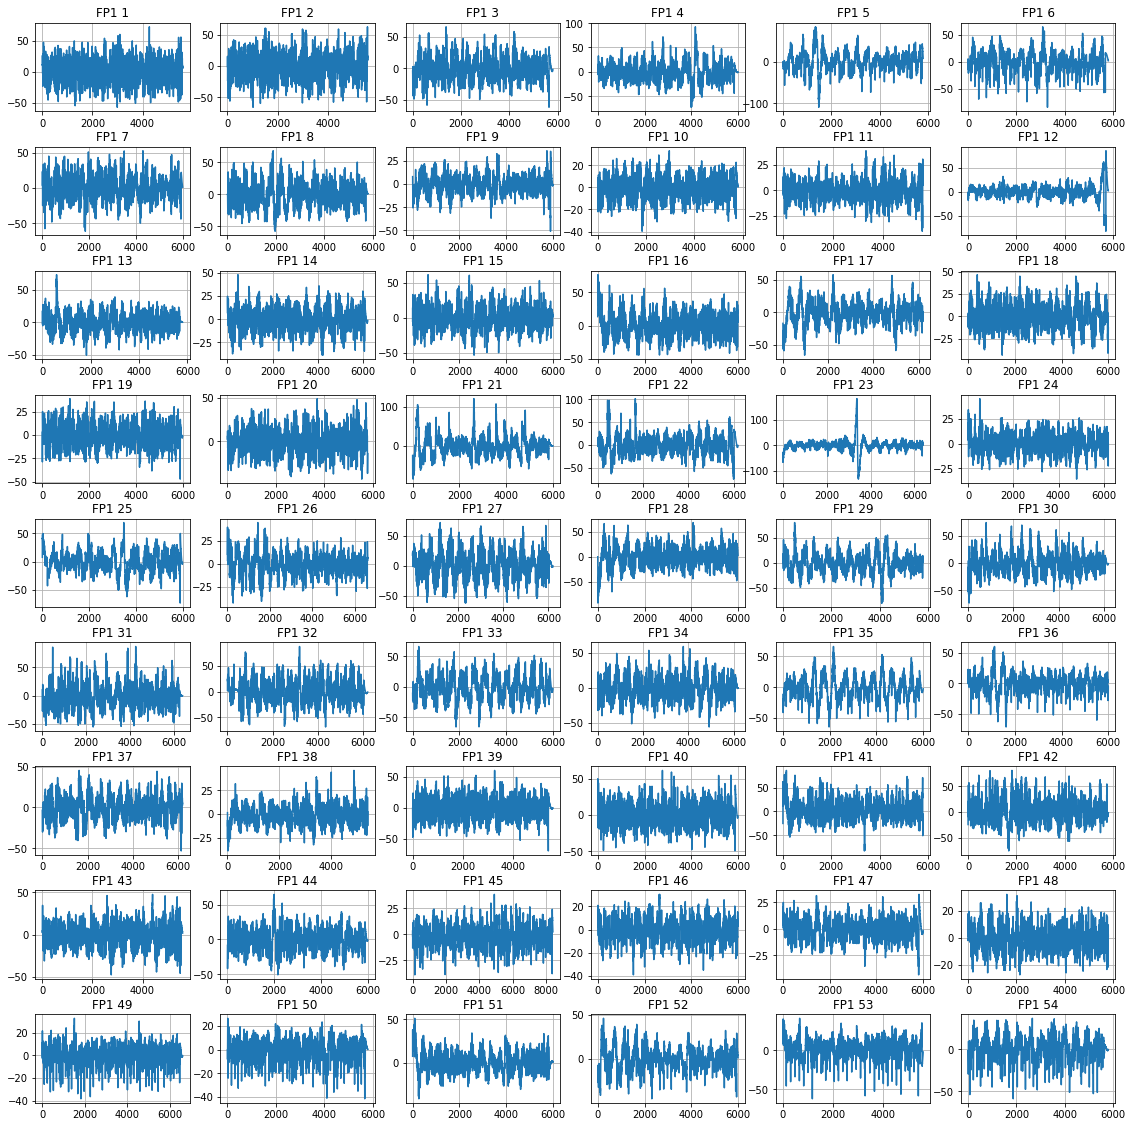

In [65]:
if jupyter:
    clean_dict = loadmat(pure_data_file)
else:
    clean_dict = loadmat("Pure_Data.mat?raw=true") 

new_clean = RemoveKeys(clean_dict)
print(new_clean.keys())
clean_list = [new_clean[eeg] for eeg in new_clean.keys()]
c_shapes = [ clean_list[i].shape[1] for i in range(0,len(clean_list))]
print("len clean_list: " + str( len(clean_list) ) )
print("numero de canales eeg por elemento de la lista: "+str( clean_list[0].shape[0] ))
print("len de clean mas larga: "+str( np.amax(c_shapes) ))
print("len de clean mas corta: "+str( np.amin(c_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(clean_list)):
    AddPlot(clean_list[i][0], 9, 6, i+1, "FP1 "+str(i+1))
plt.show()

In [66]:
for i in range(0,len(clean_list)):
    print('Mean of signal '+str(i)+': ',clean_list[i][0].mean())

Mean of signal 0:  -0.77882123
Mean of signal 1:  -0.84354794
Mean of signal 2:  -1.2241032
Mean of signal 3:  -0.95829636
Mean of signal 4:  -0.4871263
Mean of signal 5:  -0.7690525
Mean of signal 6:  -1.0169924
Mean of signal 7:  -1.0521847
Mean of signal 8:  -0.58373564
Mean of signal 9:  -0.6989684
Mean of signal 10:  -0.81157017
Mean of signal 11:  -0.70837617
Mean of signal 12:  -0.037285157
Mean of signal 13:  -0.5682892
Mean of signal 14:  -0.71478957
Mean of signal 15:  -0.20185873
Mean of signal 16:  -1.814336
Mean of signal 17:  -0.90903354
Mean of signal 18:  -0.5887386
Mean of signal 19:  -0.7657664
Mean of signal 20:  -0.7263996
Mean of signal 21:  -0.3394024
Mean of signal 22:  -1.3061951
Mean of signal 23:  -0.35510114
Mean of signal 24:  -0.8814491
Mean of signal 25:  -0.5406576
Mean of signal 26:  -0.41398442
Mean of signal 27:  -0.9775045
Mean of signal 28:  -0.19298024
Mean of signal 29:  -0.7530541
Mean of signal 30:  -1.1004375
Mean of signal 31:  -0.26043645
Mean

## VEOG

dict_keys(['veog_1', 'veog_2', 'veog_3', 'veog_4', 'veog_5', 'veog_6', 'veog_7', 'veog_8', 'veog_9', 'veog_10', 'veog_11', 'veog_12', 'veog_13', 'veog_14', 'veog_15', 'veog_16', 'veog_17', 'veog_18', 'veog_19', 'veog_20', 'veog_21', 'veog_22', 'veog_23', 'veog_24', 'veog_25', 'veog_26', 'veog_27', 'veog_28', 'veog_29', 'veog_30', 'veog_31', 'veog_32', 'veog_33', 'veog_34', 'veog_35', 'veog_36', 'veog_37', 'veog_38', 'veog_39', 'veog_40', 'veog_41', 'veog_42', 'veog_43', 'veog_44', 'veog_45', 'veog_46', 'veog_47', 'veog_48', 'veog_49', 'veog_50', 'veog_51', 'veog_52', 'veog_53', 'veog_54'])
len veog_list: 54
len de veog mas larga: 8401
len de veog mas corta: 5401


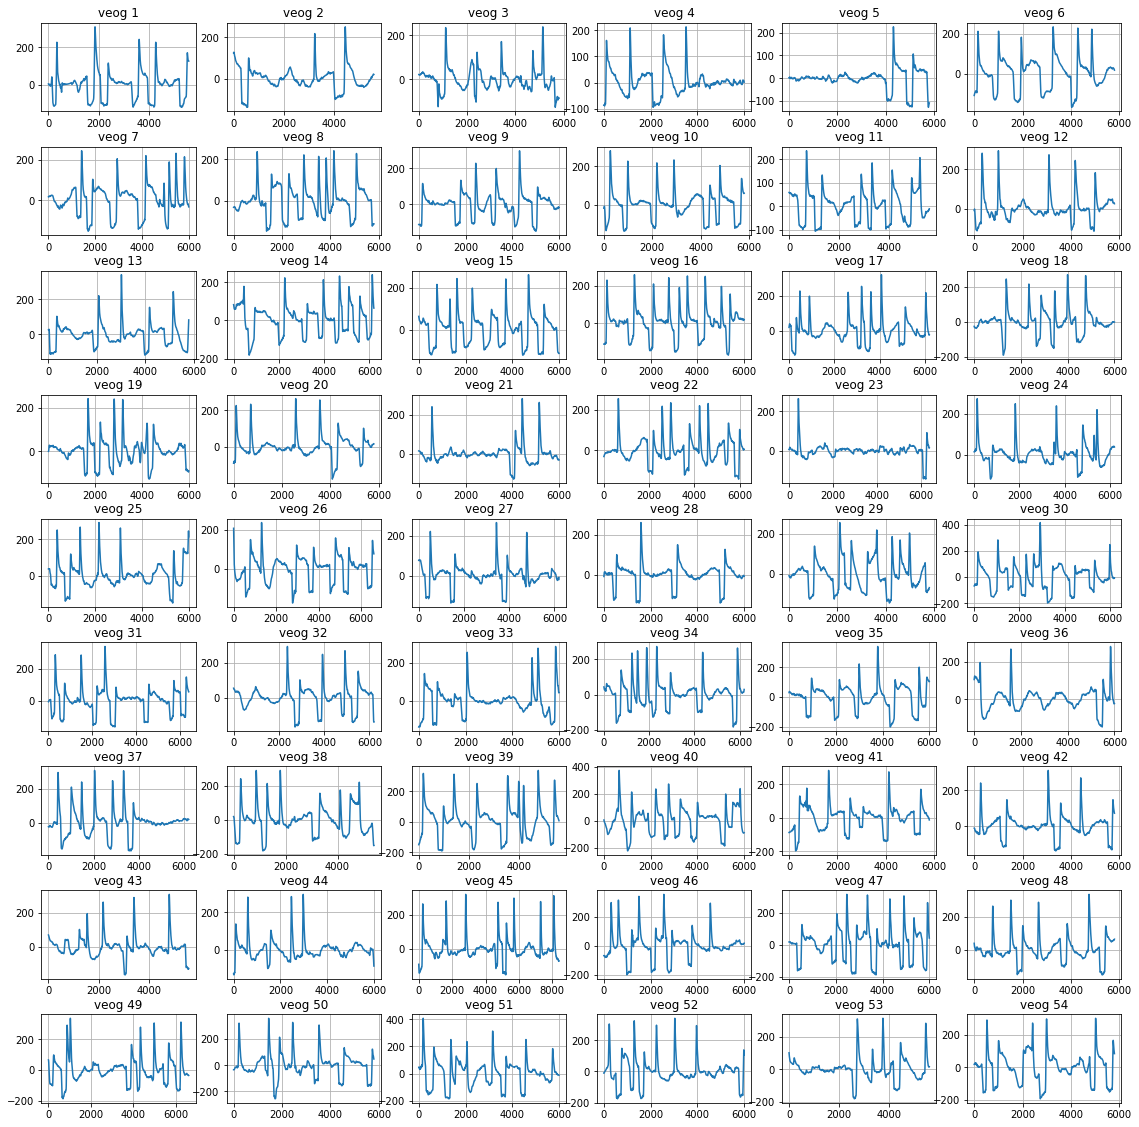

In [67]:
if jupyter:
    veog_dict = loadmat(veog_file)
else:
    veog_dict = loadmat("VEOG.mat?raw=true")

keys = [veog_dict.keys()]
new_veog = RemoveKeys(veog_dict)
print(new_veog.keys())
veog_list = [new_veog[veog] for veog in new_veog.keys()]
v_shapes = [ veog_list[i].shape[1] for i in range(0,len(veog_list))]
print("len veog_list: " + str( len(veog_list) ) )
print("len de veog mas larga: "+str( np.amax(v_shapes) ))
print("len de veog mas corta: "+str( np.amin(v_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(veog_list)):
    AddPlot(veog_list[i][0], 9, 6, i+1, "veog "+str(i+1))
plt.show()


## HEOG

dict_keys(['heog_1', 'heog_2', 'heog_3', 'heog_4', 'heog_5', 'heog_6', 'heog_7', 'heog_8', 'heog_9', 'heog_10', 'heog_11', 'heog_12', 'heog_13', 'heog_14', 'heog_15', 'heog_16', 'heog_17', 'heog_18', 'heog_19', 'heog_20', 'heog_21', 'heog_22', 'heog_23', 'heog_24', 'heog_25', 'heog_26', 'heog_27', 'heog_28', 'heog_29', 'heog_30', 'heog_31', 'heog_32', 'heog_33', 'heog_34', 'heog_35', 'heog_36', 'heog_37', 'heog_38', 'heog_39', 'heog_40', 'heog_41', 'heog_42', 'heog_43', 'heog_44', 'heog_45', 'heog_46', 'heog_47', 'heog_48', 'heog_49', 'heog_50', 'heog_51', 'heog_52', 'heog_53', 'heog_54'])
len heog_list: 54
len de heog mas larga: 8401
len de heog mas corta: 5401


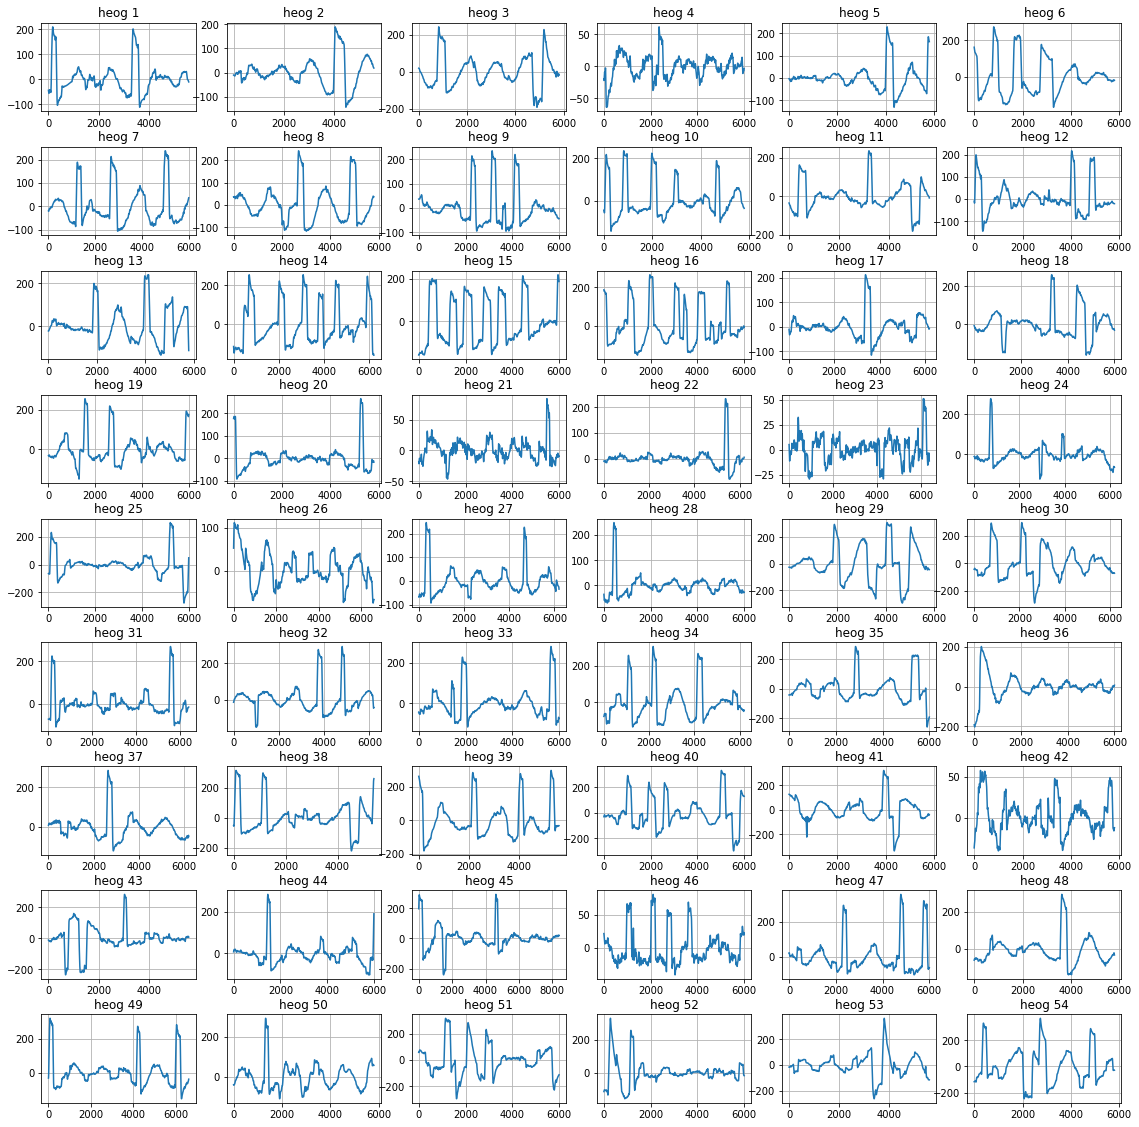

In [68]:
if jupyter:
    heog_dict = loadmat(heog_file)
else:
    heog_dict = loadmat("HEOG.mat?raw=true")

new_heog = RemoveKeys(heog_dict)
print(new_heog.keys())
heog_list = [new_heog[heog] for heog in new_heog.keys()]
h_shapes = [ heog_list[i].shape[1] for i in range(0,len(heog_list))]
print("len heog_list: " + str( len(heog_list) ) )
print("len de heog mas larga: "+str( np.amax(h_shapes) ))
print("len de heog mas corta: "+str( np.amin(h_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(heog_list)):
    AddPlot(heog_list[i][0], 9, 6, i+1, "heog "+str(i+1))
plt.show()

## EEG Contaminada

dict_keys(['sim1_con', 'sim2_con', 'sim3_con', 'sim4_con', 'sim5_con', 'sim6_con', 'sim7_con', 'sim8_con', 'sim9_con', 'sim10_con', 'sim11_con', 'sim12_con', 'sim13_con', 'sim14_con', 'sim15_con', 'sim16_con', 'sim17_con', 'sim18_con', 'sim19_con', 'sim20_con', 'sim21_con', 'sim22_con', 'sim23_con', 'sim24_con', 'sim25_con', 'sim26_con', 'sim27_con', 'sim28_con', 'sim29_con', 'sim30_con', 'sim31_con', 'sim32_con', 'sim33_con', 'sim34_con', 'sim35_con', 'sim36_con', 'sim37_con', 'sim38_con', 'sim39_con', 'sim40_con', 'sim41_con', 'sim42_con', 'sim43_con', 'sim44_con', 'sim45_con', 'sim46_con', 'sim47_con', 'sim48_con', 'sim49_con', 'sim50_con', 'sim51_con', 'sim52_con', 'sim53_con', 'sim54_con'])
len cont_list: 54
len de cont mas larga: 8401
len de cont mas corta: 5401


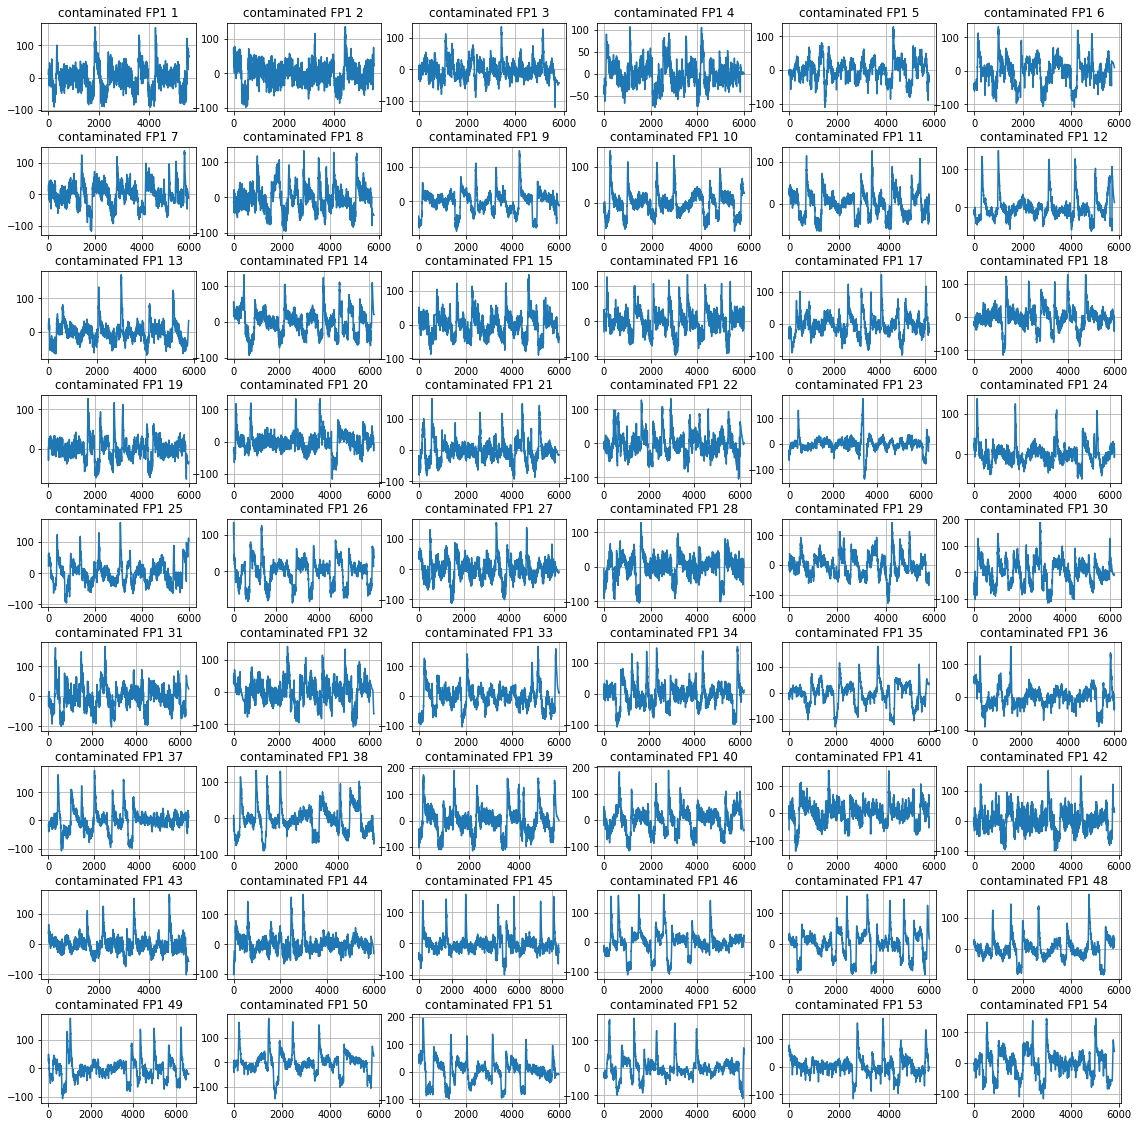

In [69]:
if jupyter:
    cont_data_dict = loadmat(cont_data_file)
else:
    cont_data_dict = loadmat("Contaminated_Data.mat?raw=true")

new_cont_data = RemoveKeys(cont_data_dict)
print(new_cont_data.keys())
cont_data_list = [new_cont_data[cont_data] for cont_data in new_cont_data.keys()]
c_shapes = [ cont_data_list[i].shape[1] for i in range(0,len(cont_data_list))]
print("len cont_list: " + str( len(cont_data_list) ) )
print("len de cont mas larga: "+str( np.amax(c_shapes) ))
print("len de cont mas corta: "+str( np.amin(c_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(cont_data_list)):
    AddPlot(cont_data_list[i][0], 9, 6, i+1, "contaminated FP1 "+str(i+1))
plt.show()

In [70]:
for i in range(0,len(cont_data_list)):
    print('Mean of signal '+str(i+1)+': ',cont_data_list[i][0].mean())

Mean of signal 1:  -1.861887253600079
Mean of signal 2:  -0.731348440028465
Mean of signal 3:  -2.0934502727264905
Mean of signal 4:  -0.2531732949115543
Mean of signal 5:  -0.8850663549869924
Mean of signal 6:  -0.8793568791674861
Mean of signal 7:  -0.7386421343397646
Mean of signal 8:  -1.9138071054329113
Mean of signal 9:  -0.8956843258177036
Mean of signal 10:  -1.5405811122873079
Mean of signal 11:  -0.09937375206869428
Mean of signal 12:  -0.49553576533706245
Mean of signal 13:  -2.5573161988307374
Mean of signal 14:  0.5053242895583379
Mean of signal 15:  -1.1412781181186065
Mean of signal 16:  0.4199685075246896
Mean of signal 17:  -2.332377879613783
Mean of signal 18:  -1.9440552873657686
Mean of signal 19:  -0.8886932993549502
Mean of signal 20:  -0.533107656717732
Mean of signal 21:  -1.0529020970972518
Mean of signal 22:  -0.8899362131495463
Mean of signal 23:  -1.8962002492605374
Mean of signal 24:  0.15518879380339654
Mean of signal 25:  0.06620113784532669
Mean of signa

## PSD de la energia

In [71]:
#terminar

## Espectrograma

### Señal contaminada

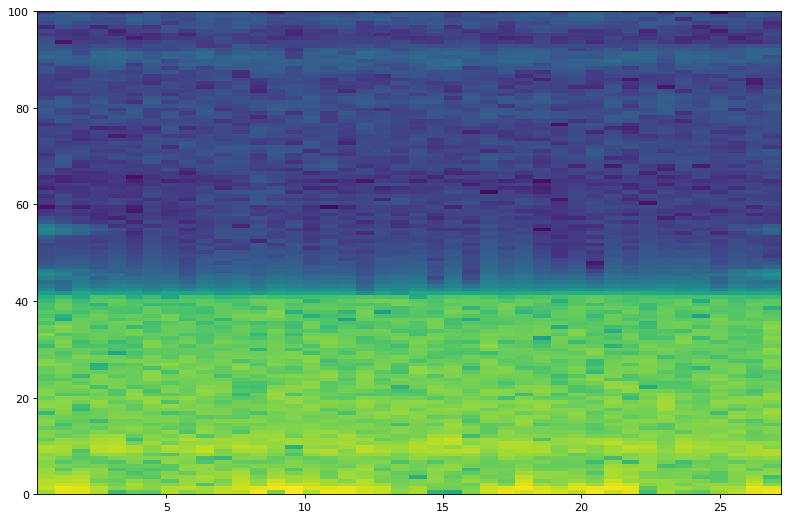

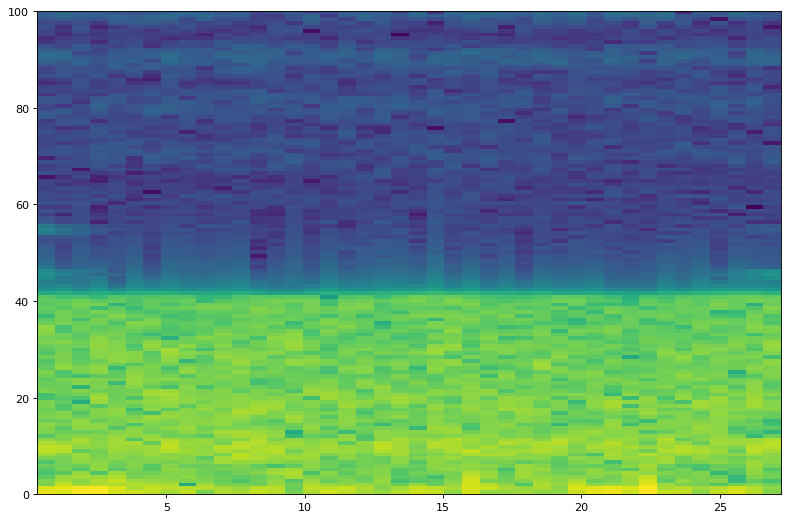

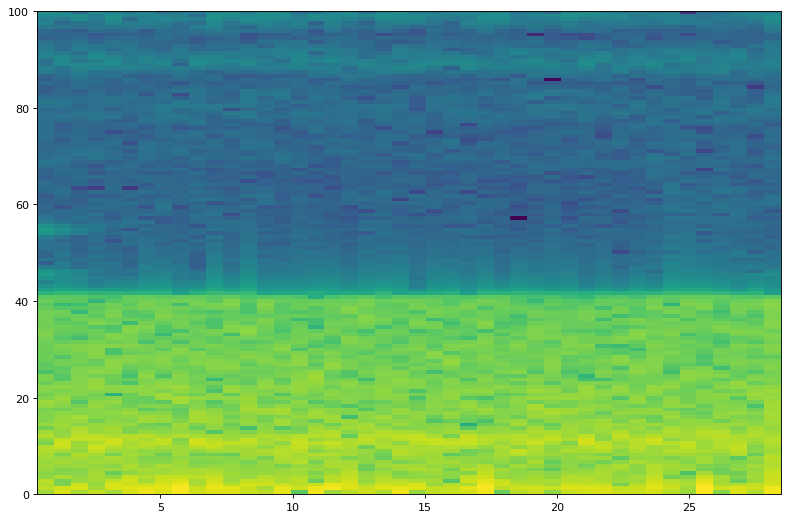

In [72]:
for i in range(0,3):
    plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
    plt.specgram(cont_data_list[i][0], NFFT=None, Fs=200, Fc=None, detrend=None, window=None, noverlap=None, 
                           cmap=None, xextent=None, pad_to=None, sides=None, scale_by_freq=None, mode=None,
                           scale=None, vmin=None, vmax=None)
    plt.show()

### VEOG

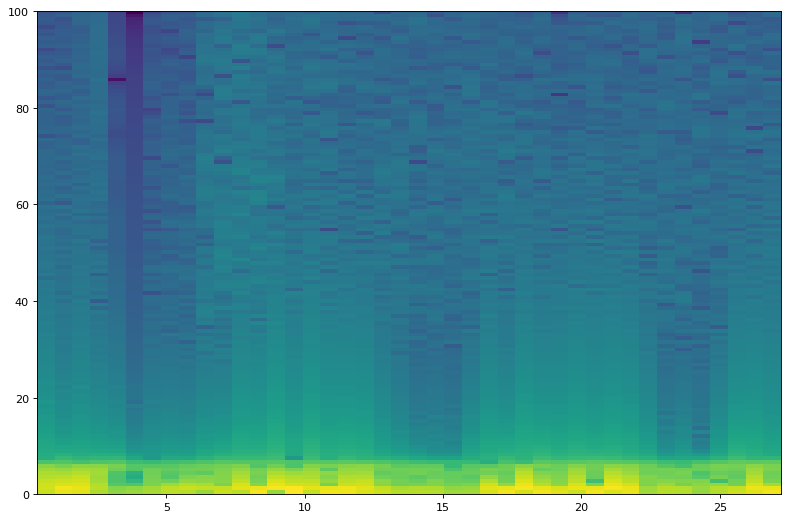

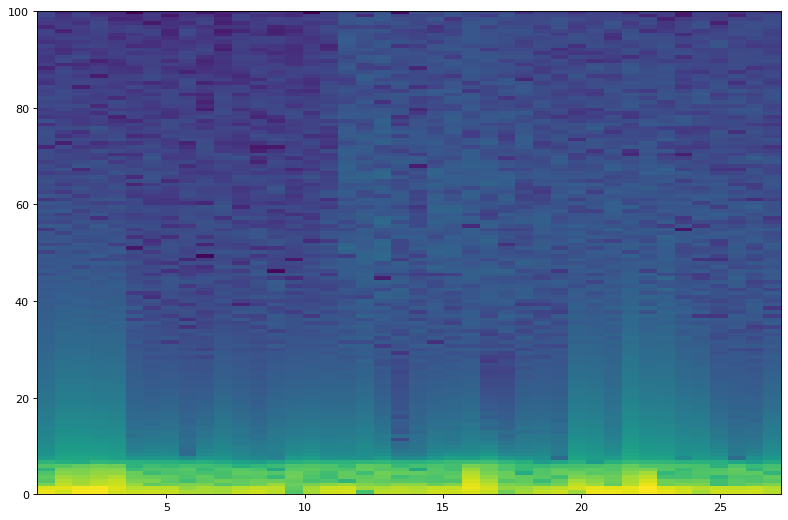

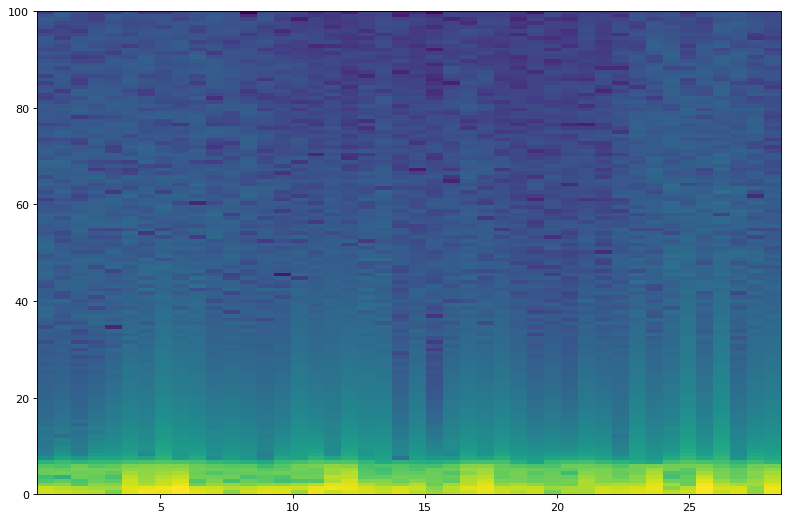

In [73]:
for i in range(0,3):
    plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
    plt.specgram(veog_list[i][0], NFFT=None, Fs=200, Fc=None, detrend=None, window=None, noverlap=None, 
                           cmap=None, xextent=None, pad_to=None, sides=None, scale_by_freq=None, mode=None,
                           scale=None, vmin=None, vmax=None)
    plt.show()

### HEOG

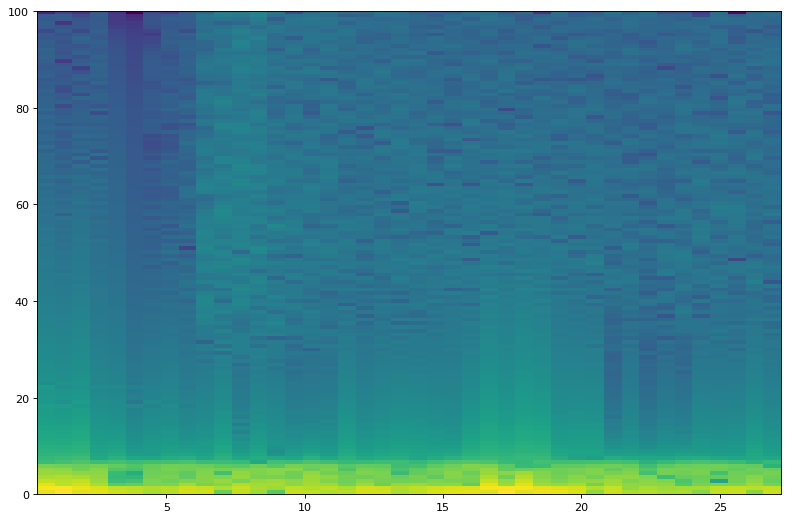

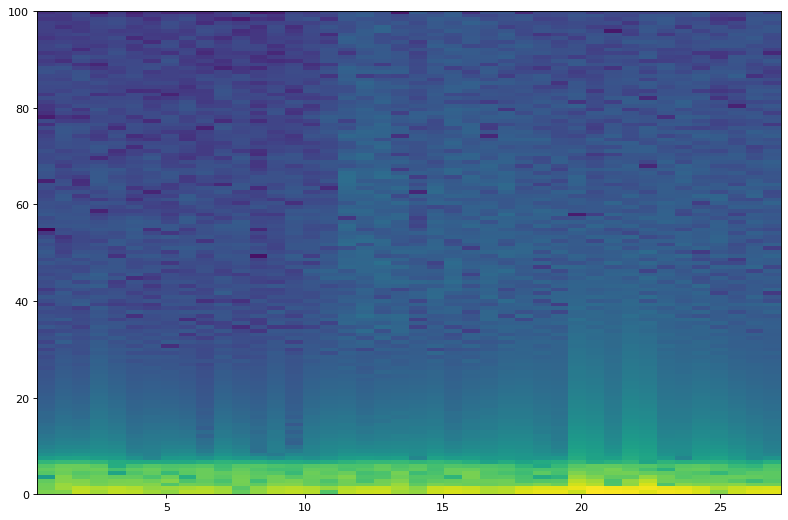

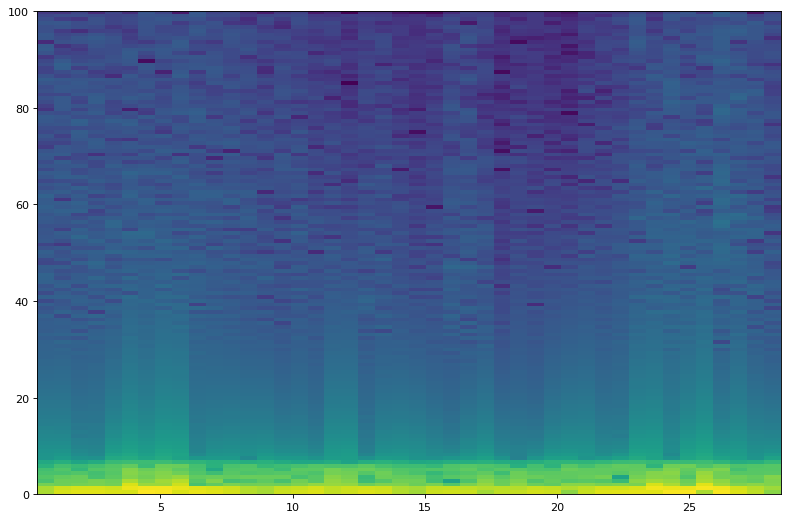

In [74]:
for i in range(0,3):
    plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
    plt.specgram(heog_list[i][0], NFFT=None, Fs=200, Fc=None, detrend=None, window=None, noverlap=None, 
                           cmap=None, xextent=None, pad_to=None, sides=None, scale_by_freq=None, mode=None,
                           scale=None, vmin=None, vmax=None)
    plt.show()

## FFT

### Señal contaminada

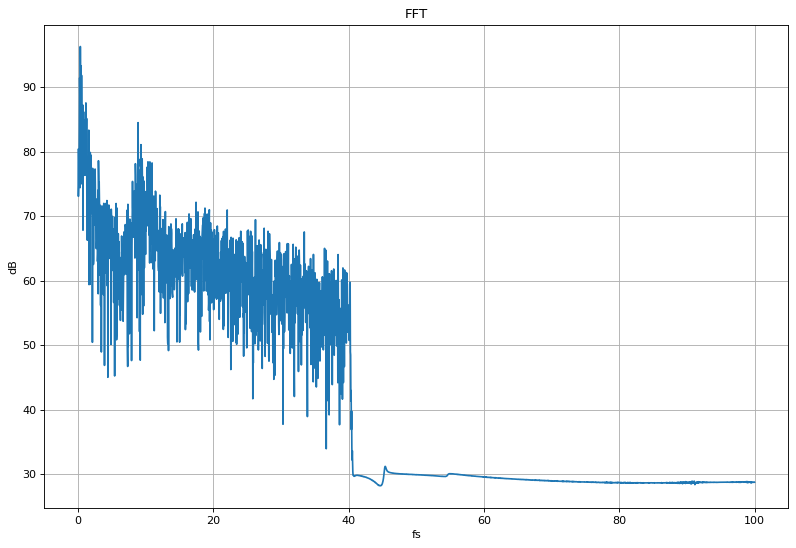

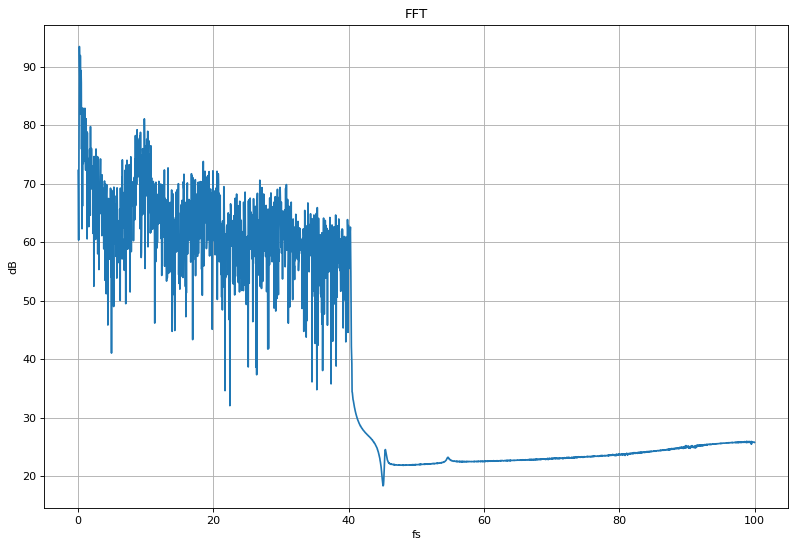

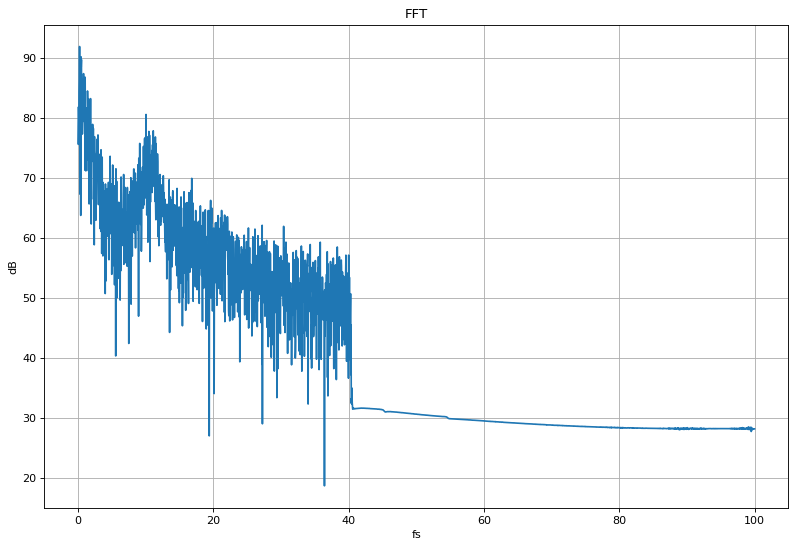

In [75]:
for i in range(0,3):
    plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
    plt.ylabel('dB')
    plt.xlabel('fs')
    plt.title('FFT')
    plt.grid('on')
    plt.plot(np.fft.rfftfreq(len(cont_data_list[i][0]), d=1/200),20*np.log10(np.abs(np.fft.rfft(cont_data_list[i][0]))))
    plt.show()

Al observar que la FFT de diferentes FP son muy similares, se pueden considerar realizaciones de un mismo proceso. De manera que promediamos las FFT de las realizaciones para obtener una mejor estimacion del espectro.

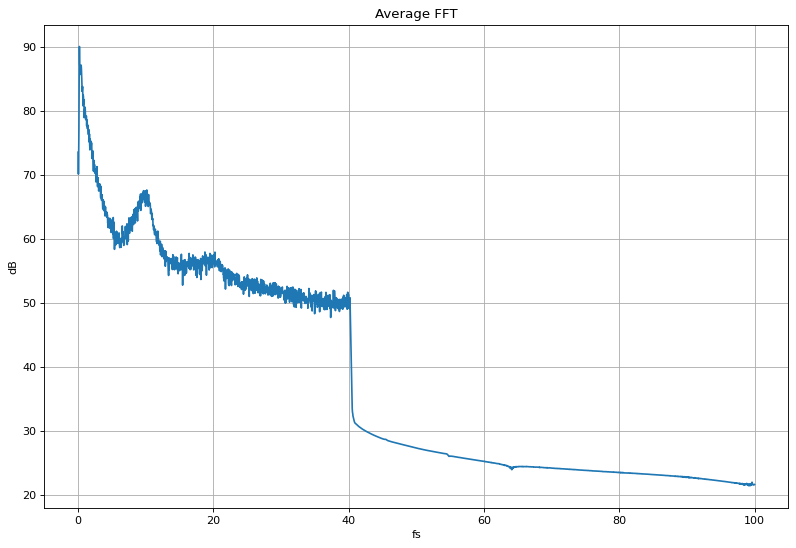

In [76]:
fft_list = []
for i in range(0,len(cont_data_list)):
    fft_list.append(20*np.log10(np.abs(np.fft.rfft(cont_data_list[i][0][:5401]))))

fft_list = np.asarray(fft_list, dtype=object)
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('dB')
plt.xlabel('fs')
plt.title('Average FFT')
plt.grid('on')
plt.plot(np.fft.rfftfreq(len(cont_data_list[i][0][:5401]), d=1/200), fft_list.mean(axis=0))
plt.show()

### VEOG

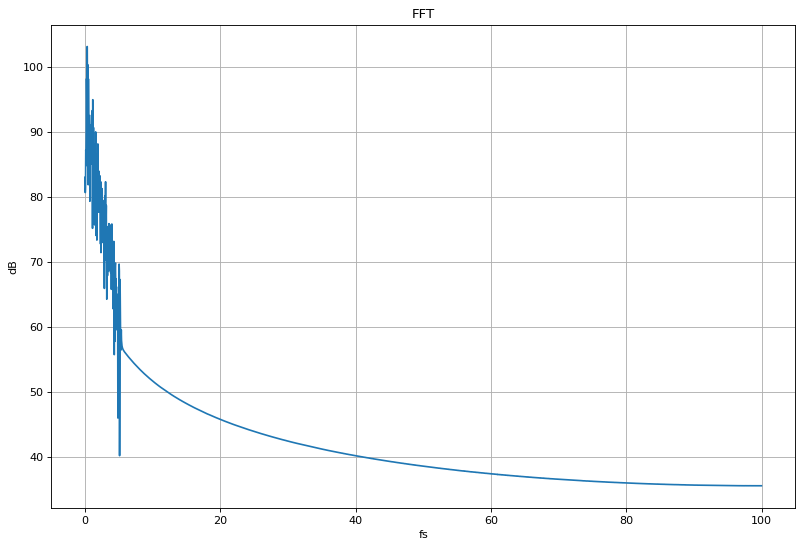

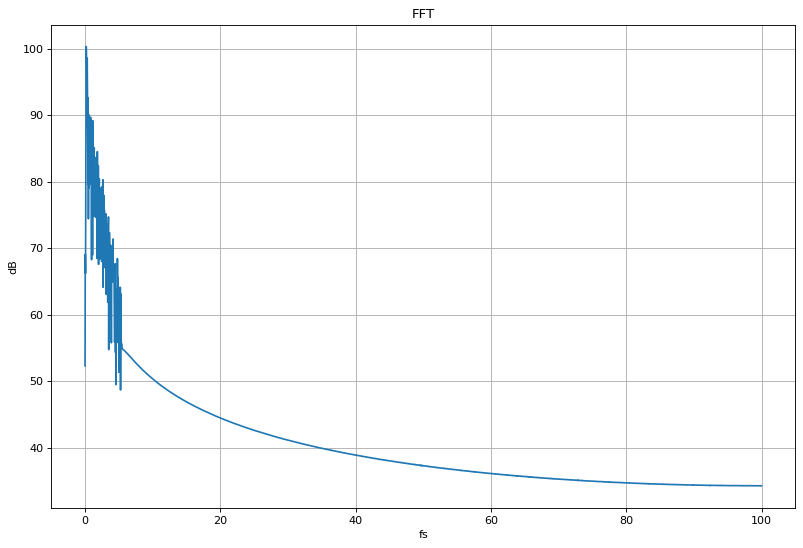

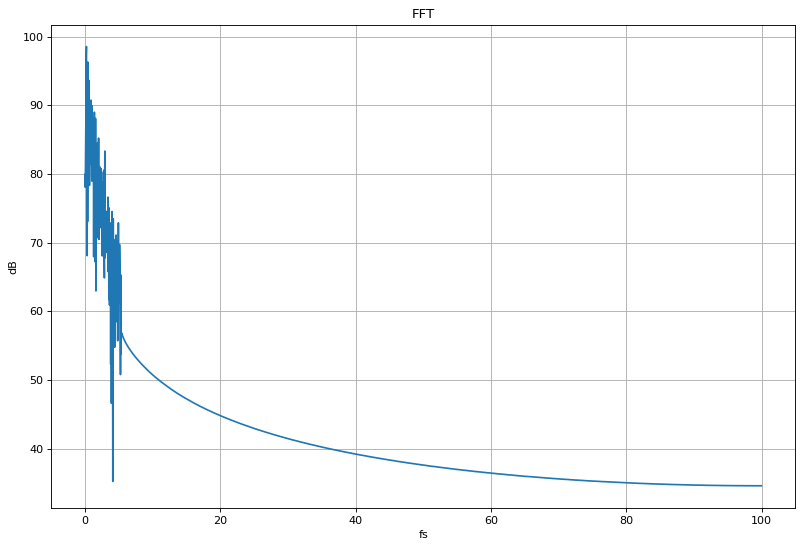

In [77]:
for i in range(0,3):
    plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
    plt.ylabel('dB')
    plt.xlabel('fs')
    plt.title('FFT')
    plt.grid('on')
    plt.plot(np.fft.rfftfreq(len(veog_list[i][0]), d=1/200),20*np.log10(np.abs(np.fft.rfft(veog_list[i][0]))))
    plt.show()

Al observar que la FFT de diferentes FP son muy similares, se pueden considerar realizaciones de un mismo proceso. De manera que promediamos las FFT de las realizaciones para obtener una mejor estimacion del espectro.

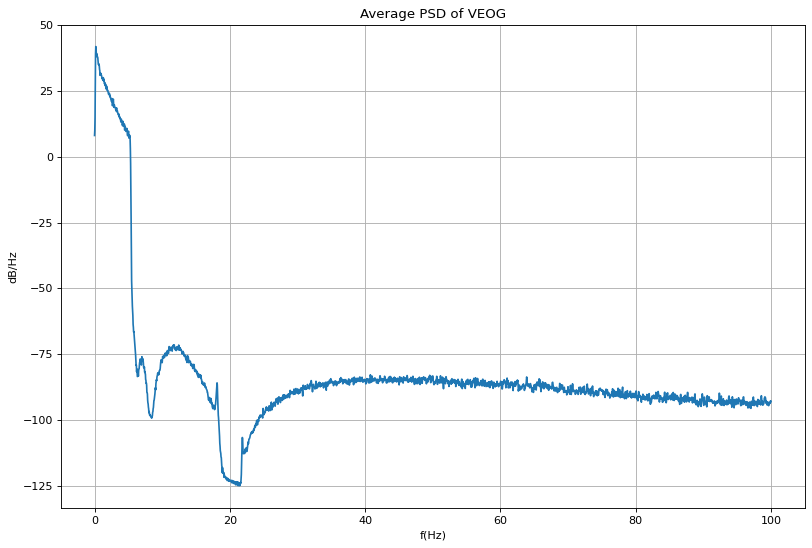

In [78]:
from matplotlib.mlab import window_none
fft_list = []
pxx_list = []
pxx_freqs = []
for i in range(0,len(cont_data_list)):
    pxx, freqs = psd(veog_list[i][0][:5401], NFFT=5401, Fs=200)
    pxx_list.append(pxx)
    pxx_freqs.append(freqs)

pxx_list = np.asarray(pxx_list, dtype=object)
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('dB/Hz')
plt.xlabel('f(Hz)')
plt.title('Average PSD of VEOG')
plt.grid('on')
plt.plot(pxx_freqs[0], 10*np.log10(pxx_list.mean(axis=0).astype(np.float64)) )
plt.show()

### HEOG

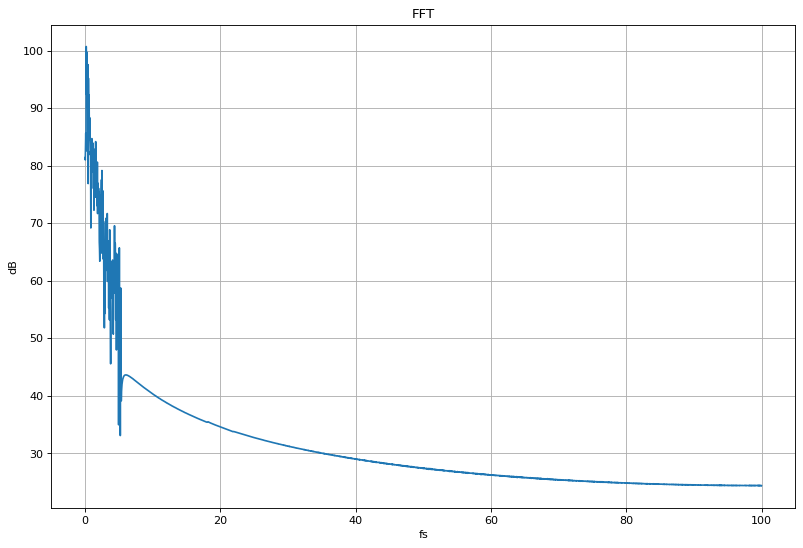

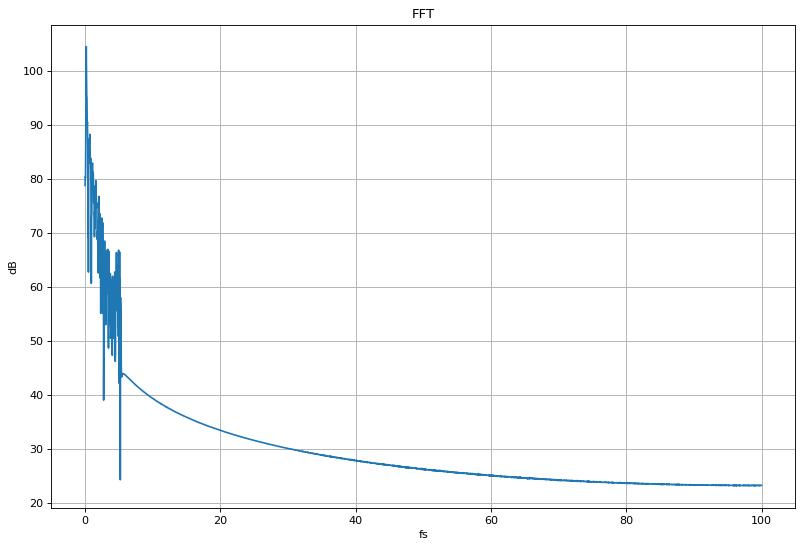

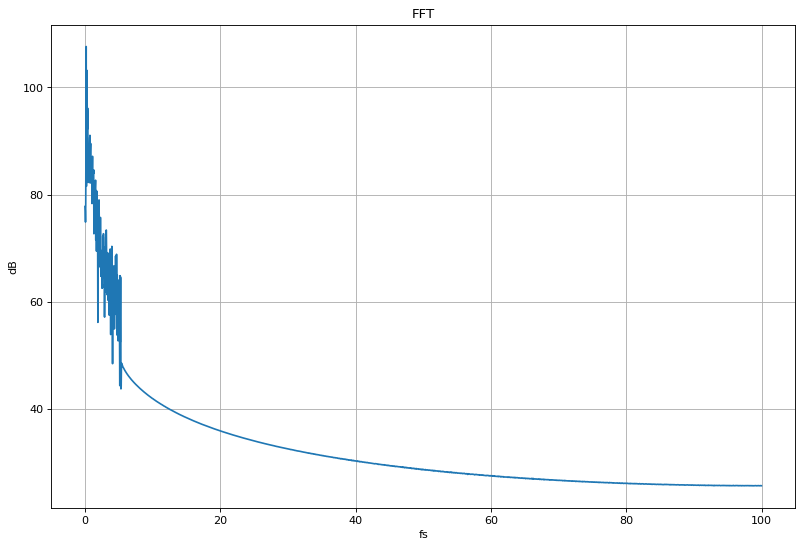

In [26]:
for i in range(0,3):
    plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
    plt.ylabel('dB')
    plt.xlabel('fs')
    plt.title('FFT')
    plt.grid('on')
    plt.plot(np.fft.rfftfreq(len(heog_list[i][0]), d=1/200),20*np.log10(np.abs(np.fft.rfft(heog_list[i][0]))))
    plt.show()

Al observar que la FFT de diferentes FP son muy similares, se pueden considerar realizaciones de un mismo proceso. De manera que promediamos las FFT de las realizaciones para obtener una mejor estimacion del espectro.

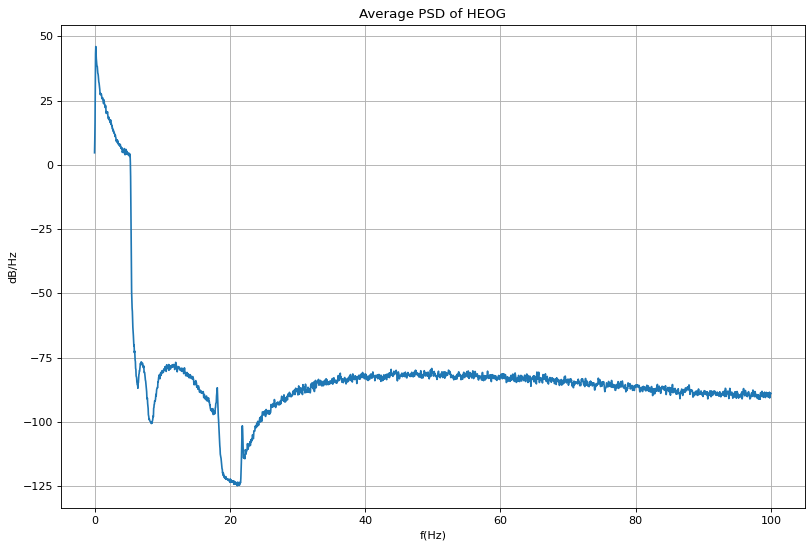

In [59]:
from matplotlib.mlab import window_none
fft_list = []
pxx_list = []
pxx_freqs = []
for i in range(0,len(cont_data_list)):
    pxx, freqs = psd(heog_list[i][0][:5401], NFFT=5401, Fs=200)
    pxx_list.append(pxx)
    pxx_freqs.append(freqs)

pxx_list = np.asarray(pxx_list, dtype=object)
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('dB/Hz')
plt.xlabel('f(Hz)')
plt.title('Average PSD of HEOG')
plt.grid('on')
plt.plot(pxx_freqs[0], 10*np.log10(pxx_list.mean(axis=0).astype(np.float64)) )
plt.show()

# Implementacion

In [ ]:
def plot_result(contaminated_signal, clean_signal, filtered_signal):
    plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
    plt.ylabel('Amplitude')
    plt.xlabel('n')
    plt.title('Estimation vs Contaminated EEG')
    plt.grid('on')
    plt.plot(filtered_signal[:-100], label='Filtered')
    plt.plot(contaminated_signal, label='Contaminated')
    plt.legend()
    plt.show()

    plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
    plt.ylabel('Amplitude')
    plt.xlabel('n')
    plt.title('Filtered vs Clean EEG')
    plt.grid('on')
    plt.plot(filtered_signal[:-100], label='Filtered')
    plt.plot(clean_signal, label='Clean')
    plt.legend()
    plt.show()

## LMS clasico

In [ ]:
class FilterLMS():    
    def __init__(self, m, mu=0.01):
      self.m = m
      self.mu = mu
      self.w = np.zeros(m)
      self.inputs = np.zeros(m)

    def adapt(self, e):
      self.w += self.mu * e * self.inputs        

    def filter_sample(self, x):
      shifted = shift(self.inputs, 1, cval=0)
      shifted[0] = x
      self.inputs = shifted
      return np.dot(self.w, self.inputs)

def FilterEOG(h_filter, v_filter, v_sample, h_sample, eeg_sample):
  #calculate outputs
  veog_out = v_filter.filter_sample(v_sample)
  heog_out = h_filter.filter_sample(h_sample)
  #estimate EEG
  clean_sample = eeg_sample - veog_out - heog_out
  return clean_sample

In [ ]:
# Eleccion del modelo
selected_mu = 1e-7
M = 2
filter1 = FilterLMS(m=M, mu=selected_mu)
filter2 = FilterLMS(m=M, mu=selected_mu)

In [ ]:
contaminated_signal = cont_data_list[0][0].astype(np.float64)
veog_signal = veog_list[0][0].astype(np.float64)
heog_signal = heog_list[0][0].astype(np.float64)
desired_signal = clean_list[0][0].astype(np.float64)

clean_estimation = np.zeros(len(contaminated_signal))

for i in range(0,len(contaminated_signal)):
  veog_sample = veog_signal[i]
  heog_sample = heog_signal[i]
  eeg_sample = contaminated_signal[i]

  #calculate outputs
  veog_out = filter1.filter_sample(veog_sample)
  heog_out = filter2.filter_sample(heog_sample)
  #estimate EEG
  clean_estimation[i] =  eeg_sample - veog_out - heog_out

  # update filters
  filter1.adapt( e=clean_estimation[i])
  filter2.adapt( e=clean_estimation[i])

plot_result(contaminated_signal, desired_signal, clean_estimation)

### Autovalores

In [ ]:
def autocorreltion(x):
  norm_x = (x - x.mean())
  return np.correlate(norm_x,norm_x,mode='full') / len(x)

def get_eigenvalues(r,M):
    r_mat = toeplitz(r[r.argmax():r.argmax()+M])
    ev = np.linalg.eig(r_mat)
    return ev
def plot_ev(ev):
    plt.figure(num=None, figsize=(15,6), dpi=80, facecolor='w', edgecolor='k')
    plt.hist(ev, bins=10)
    plt.title('Eigenvalues Distribution')
    plt.ylabel('Multiplicity')
    plt.xlabel('Eigenvalue')
    plt.grid('on')
    plt.show()

In [ ]:
M = 1
v_eig_array = np.zeros(len(cont_data_list))
#Plot settings
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.title('Eigenvalues for VEOG Distribution')
plt.ylabel('Multiplicity')
plt.xlabel('Eigenvalue')
plt.grid('on')

for i in range(0, len(cont_data_list)):
  veog_signal = veog_list[i][0].astype(np.float64)
  r_v = autocorreltion(veog_signal)
  v_eig = get_eigenvalues(r_v,M)
  v_eig_array[i] = v_eig[0][0]
  plt.hist(v_eig, bins=20)
plt.show()
print("v_eigenvalues mean: "+str(v_eig_array.mean()))
print("v_eigenvalues std: "+str(v_eig_array.std()))

In [ ]:
M = 1
h_eig_array = np.zeros(len(cont_data_list))
#Plot settings
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.title('Eigenvalues for HEOG Distribution')
plt.ylabel('Multiplicity')
plt.xlabel('Eigenvalue')
plt.grid('on')

for i in range(0, len(cont_data_list)):
  heog_signal = heog_list[i][0].astype(np.float64)
  r_h = autocorreltion(heog_signal)
  h_eig = get_eigenvalues(r_h,M)
  h_eig_array[i] = h_eig[0][0]
  plt.hist(h_eig, bins=20)
plt.show()
print("h_eigenvalues mean: "+str(h_eig_array.mean()))
print("h_eigenvalues std: "+str(h_eig_array.std()))

Analizando ambos histogramas se puede ver que la señal HEOG es la que tiene autovalores mas grandes, por lo que tendra una condicion de convergencia mas estricta que la señal VEOG.

Dado que la condicion de convergencia de LMS esta dada por:
$$ 0< \mu < \frac{2}{\lambda_{max}}     $$
y tomando como criterio:
$$ \lambda_{max}=mean\{ \lambda_{heog} \} + 3std\{\lambda_{heog}\} $$
$$=6283+12905=19188$$
Por lo que se tiene como condicion de estabilidad:
$$ \mu_{max}=10^{-4}$$

### Error cuadratico medio

In [ ]:
selected_mu = 1e-7
M_values = np.linspace(start=1,stop=3, num=3, dtype = int)
js = np.zeros( (54,5401) )
j_list = np.zeros( (len(M_values),5401))

plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('J(n)')
plt.xlabel('n')
plt.title('MSE segun el orden del filtro')
plt.grid('on')

for j in range(0,len(M_values)):
  M_test = M_values[j]
  for i in range(0, len(cont_data_list)):
    contaminated_signal = cont_data_list[i][0].astype(np.float64)
    veog_signal = veog_list[i][0].astype(np.float64)
    heog_signal = heog_list[i][0].astype(np.float64)
    desired_signal = clean_list[i][0].astype(np.float64)
    clean_estimation = np.zeros(len(contaminated_signal))
    filter1 = FilterLMS(m=M_test, mu=selected_mu)
    filter2 = FilterLMS(m=M_test, mu=selected_mu)

    for k in range(0,len(contaminated_signal)):
      veog_sample = veog_signal[k]
      heog_sample = heog_signal[k]
      eeg_sample = contaminated_signal[k]
      #calculate outputs
      veog_out = filter1.filter_sample(veog_sample)
      heog_out = filter2.filter_sample(heog_sample)
      #estimate EEG
      clean_estimation[k] =  eeg_sample - veog_out - heog_out

      # update filters
      filter1.adapt( e=clean_estimation[k])
      filter2.adapt( e=clean_estimation[k])
    js[i] = (desired_signal[:5401] - clean_estimation[:5401])**2
  j_list[j] =js.mean(axis=0)
  plt.plot(j_list[j], label="M="+str(M_test))
plt.legend()
plt.show()

En principio se grafico el J(n) para valores de M desde 1 hasta 10, al ver que no habia cambio significativo en el error. Se decidio graficar para valores de M hasta 3 para observar mejor cualquier diferencia sutil.

Como los tres filtros son muy similares, se decidio como valor optimo M=1. Ya que se obtiene el filtro mas simple y con menor desajuste.

In [ ]:
M_test = 1
mu_values = np.logspace(start=-5,stop=-7, num=5)
js = np.zeros( (len(cont_data_list),5401) )
j_list = np.zeros( (len(mu_values),5401))

plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('J(n)')
plt.xlabel('n')
plt.title('MSE segun el λ')
plt.grid('on')
plt.ylim(top=1000)

for j in range(0,len(mu_values)):
  selected_mu = mu_values[j]
  for i in range(0, len(cont_data_list)):
    contaminated_signal = cont_data_list[i][0].astype(np.float64)
    veog_signal = veog_list[i][0].astype(np.float64)
    heog_signal = heog_list[i][0].astype(np.float64)
    desired_signal = clean_list[i][0].astype(np.float64)
    clean_estimation = np.zeros(len(contaminated_signal))
    filter1 = FilterLMS(m=M_test, mu=selected_mu)
    filter2 = FilterLMS(m=M_test, mu=selected_mu)

    for k in range(0,len(contaminated_signal)):
      veog_sample = veog_signal[k]
      heog_sample = heog_signal[k]
      eeg_sample = contaminated_signal[k]
      #calculate outputs
      veog_out = filter1.filter_sample(veog_sample)
      heog_out = filter2.filter_sample(heog_sample)
      #estimate EEG
      clean_estimation[k] =  eeg_sample - veog_out - heog_out

      # update filters
      filter1.adapt( e=clean_estimation[k])
      filter2.adapt( e=clean_estimation[k])
    js[i] = (desired_signal[:5401] - clean_estimation[:5401])**2
  j_list[j] =js.mean(axis=0)
  plt.plot(j_list[j], label="λ="+str(selected_mu))
plt.legend()
plt.show()

De la grafica anterior se puede observar que la velocidad de convergencia es similiar para todos los $\lambda$ (Menos para $\lambda = 10^{-5}$ que parece inestable).Sin embargo, teniendo en cuenta tambien el desajuste es conveniente elegir un valor de $\lambda$ pequeño.

En terminos de desajuste la curva correspondiente a $\lambda = 10^{-7}$ es practicamente igual a la de  $\lambda = 3\cdot10^{-7}$, pero la ultima tiene la ventaja de tener una velocidad de convergencia mayor.
Por esta razon se elige como hiperparametro optimo:
$$\lambda = 3\cdot 10^{-7}$$

### Tracking de coeficientes

In [ ]:
#Mediciones
contaminated_signal = cont_data_list[0][0].astype(np.float64) 
veog_signal = veog_list[0][0].astype(np.float64) 
heog_signal = heog_list[0][0].astype(np.float64)
desired_signal = clean_list[0][0].astype(np.float64)

clean_estimation = np.zeros(len(contaminated_signal))
#Parametros
selected_mu = 3e-7
M = 1
w_v = np.zeros((len(contaminated_signal),M))
w_h = np.zeros((len(contaminated_signal),M))

filter1 = FilterLMS(m=M, mu=selected_mu)
filter2 = FilterLMS(m=M, mu=selected_mu)
for k in range(0,len(contaminated_signal)):
  veog_sample = veog_signal[k]
  heog_sample = heog_signal[k]
  eeg_sample = contaminated_signal[k]
  w_v[k] = filter1.w
  w_h[k] = filter2.w

  #calculate outputs
  veog_out = filter1.filter_sample(veog_sample)
  heog_out = filter2.filter_sample(heog_sample)
  #estimate EEG
  clean_estimation[k] =   eeg_sample - veog_out - heog_out

  # update filters
  filter1.adapt( e=clean_estimation[k])
  filter2.adapt( e=clean_estimation[k])

plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('w(n)')
plt.xlabel('n')
plt.title('Coefficient Tracking VEOG')
plt.grid('on')
for i in range(M):
    plt.plot(w_v[:,i], label=r'$w_{%i}$'%i)
plt.legend()
plt.show()

plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('w(n)')
plt.xlabel('n')
plt.title('Coefficient Tracking HEOG')
plt.grid('on')
for i in range(M):
    plt.plot(w_h[:,i], label=r'$w_{%i}$'%i)
plt.legend()
plt.show()

## LMS Normalizado

In [ ]:
class FilterNLMS():    
    def __init__(self, m, mu=0.01, delta=10e-9):
        self.m = m
        self.mu = mu
        self.delta = delta
        self.w = np.zeros(m)
        self.inputs = np.zeros(m)

    def adapt(self, e):
        nu = self.mu / (self.delta + np.dot(self.inputs, self.inputs))
        self.w += nu * e * self.inputs        

    def filter_sample(self, x):
        shifted = shift(self.inputs, 1, cval=0)
        shifted[0] = x
        self.inputs = shifted
        return np.dot(self.w, self.inputs)

In [ ]:
# Eleccion del modelo
selected_mu = 0.5
selected_delta = 2
M = 1
filter1 = FilterNLMS(m=M, mu=selected_mu, delta=selected_delta)
filter2 = FilterNLMS(m=M, mu=selected_mu, delta=selected_delta)

In [ ]:
contaminated_signal = cont_data_list[0][0].astype(np.float64)
veog_signal = veog_list[0][0].astype(np.float64)
heog_signal = heog_list[0][0].astype(np.float64)
desired_signal = clean_list[0][0].astype(np.float64)

clean_estimation = np.zeros(len(contaminated_signal))

for i in range(0,len(contaminated_signal)):
  veog_sample = veog_signal[i]
  heog_sample = heog_signal[i]
  eeg_sample = contaminated_signal[i]

  #calculate outputs
  veog_out = filter1.filter_sample(veog_sample)
  heog_out = filter2.filter_sample(heog_sample)
  #estimate EEG
  clean_estimation[i] =  eeg_sample - veog_out - heog_out

  # update filters
  filter1.adapt( e=clean_estimation[i])
  filter2.adapt( e=clean_estimation[i])

plot_result(contaminated_signal, desired_signal, clean_estimation)

In [ ]:
selected_mu = 0.5
selected_delta = 2
M_values = np.linspace(start=1,stop=3, num=3, dtype = int)
js = np.zeros((54,5401))
j_list = np.zeros((len(M_values),5401))

plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('J(n)')
plt.xlabel('n')
plt.title('MSE segun el orden del filtro')
plt.grid('on')

for j in range(0,len(M_values)):
  M_test = M_values[j]
  for i in range(0, len(cont_data_list)):
    contaminated_signal = cont_data_list[i][0].astype(np.float64)
    veog_signal = veog_list[i][0].astype(np.float64)
    heog_signal = heog_list[i][0].astype(np.float64)
    desired_signal = clean_list[i][0].astype(np.float64)
    clean_estimation = np.zeros(len(contaminated_signal))
    filter1 = FilterNLMS(m=M_test, mu=selected_mu, delta=selected_delta)
    filter2 = FilterNLMS(m=M_test, mu=selected_mu, delta=selected_delta)

    for k in range(0,len(contaminated_signal)):
      veog_sample = veog_signal[k]
      heog_sample = heog_signal[k]
      eeg_sample = contaminated_signal[k]
      #calculate outputs
      veog_out = filter1.filter_sample(veog_sample)
      heog_out = filter2.filter_sample(heog_sample)
      #estimate EEG
      clean_estimation[k] =  eeg_sample - veog_out - heog_out

      # update filters
      filter1.adapt( e=clean_estimation[k])
      filter2.adapt( e=clean_estimation[k])
    js[i] = (desired_signal[:5401] - clean_estimation[:5401])**2
  j_list[j] =js.mean(axis=0)
  plt.plot(j_list[j], label="M="+str(M_test))
plt.legend()
plt.show()

## Variable Step LMS

In [ ]:
class FilterVSLMS():    
    def __init__(self, m, mu_k, m0, m1, mu_max, mu_min, alpha=2):
        self.m = m
        self.mu_k = mu_k
        self.m0 = m0
        self.m1 = m1
        self.mu_min = mu_min
        self.mu_max = mu_max
        self.alpha = alpha
        self.w = np.zeros(m)
        self.inputs = np.zeros(m)
        self.last_js = np.zeros((m, np.amax([m0,m1])))

    def adapt(self, e):  
        self.w += self.mu_k * e * self.inputs
        # Actualizamos mu_k
        j_sign =  np.sign(-e*self.inputs)
        for m_aux in range(self.m):
            self.last_js[m_aux] = shift(self.last_js[m_aux], 1, cval=0)
            self.last_js[m_aux,0] = j_sign[m_aux]
            if not np.all(self.last_js[m_aux,:self.m0] == self.last_js[m_aux,0]):
                if not self.mu_k[m_aux]/self.alpha < self.mu_min:
                    self.mu_k[m_aux] = self.mu_k[m_aux]/self.alpha
                else:
                    self.mu_k[m_aux] = self.mu_min
            elif np.all(self.last_js[m_aux,:self.m1] == self.last_js[m_aux,0]):
                if not self.mu_k[m_aux]*self.alpha > self.mu_max:
                    self.mu_k[m_aux]= self.mu_k[m_aux]*self.alpha
                else:
                    self.mu_k[m_aux]= self.mu_max
        
        
    def filter_sample(self, x):
        shifted = shift(self.inputs, 1, cval=0)
        shifted[0] = x
        self.inputs = shifted
        return np.dot(self.w, self.inputs)

In [ ]:
# Eleccion del modelo
M = 2
selected_m0 = 2
selected_m1 = 2
selected_mu_max = 1e-6
selected_mu_min = 1e-10
selected_mu_k = np.ones(M)*1e-6
filter1 = FilterVSLMS(m=M, mu_k=selected_mu_k.copy(), m0=selected_m0, m1=selected_m1, mu_max=selected_mu_max,
                      mu_min=selected_mu_min)
filter2 = FilterVSLMS(m=M, mu_k=selected_mu_k.copy(), m0=selected_m0, m1=selected_m1, mu_max=selected_mu_max,
                      mu_min=selected_mu_min)

In [ ]:
contaminated_signal = cont_data_list[0][0].astype(np.float64)
veog_signal = veog_list[0][0].astype(np.float64)
heog_signal = heog_list[0][0].astype(np.float64)
desired_signal = clean_list[0][0].astype(np.float64)

clean_estimation = np.zeros(len(contaminated_signal))

mu_s = []

for i in range(0,len(contaminated_signal)):
    veog_sample = veog_signal[i]
    heog_sample = heog_signal[i]
    eeg_sample = contaminated_signal[i]

    #calculate outputs
    veog_out = filter1.filter_sample(veog_sample)
    heog_out = filter2.filter_sample(heog_sample)
    #estimate EEG
    clean_estimation[i] =  eeg_sample - veog_out - heog_out
    
    mu_s.append(filter1.mu_k[0])
    # update filters
    filter1.adapt( e=clean_estimation[i])
    filter2.adapt( e=clean_estimation[i])

plot_result(contaminated_signal, desired_signal, clean_estimation)

In [ ]:
M_values = np.linspace(start=1,stop=3, num=3, dtype = int)
js = np.zeros((54,5401))
j_list = np.zeros((len(M_values),5401))

# Eleccion del modelo
selected_m0 = 2
selected_m1 = 2
selected_mu_max = 1e-6
selected_mu_min = 1e-10


plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('J(n)')
plt.xlabel('n')
plt.title('MSE segun el orden del filtro')
plt.grid('on')

for j in range(0,len(M_values)):
    M_test = M_values[j]
    print(M_test)
    for i in range(0, len(cont_data_list)):
        contaminated_signal = cont_data_list[i][0].astype(np.float64)
        veog_signal = veog_list[i][0].astype(np.float64)
        heog_signal = heog_list[i][0].astype(np.float64)
        desired_signal = clean_list[i][0].astype(np.float64)
        clean_estimation = np.zeros(len(contaminated_signal))
        filter1 = FilterVSLMS(m=M_test, mu_k=np.ones(M_test)*1e-6, m0=selected_m0, m1=selected_m1, mu_max=selected_mu_max,
                              mu_min=selected_mu_min)
        filter2 = FilterVSLMS(m=M_test, mu_k=np.ones(M_test)*1e-6, m0=selected_m0, m1=selected_m1, mu_max=selected_mu_max,
                              mu_min=selected_mu_min)

        for k in range(0,len(contaminated_signal)):
            veog_sample = veog_signal[k]
            heog_sample = heog_signal[k]
            eeg_sample = contaminated_signal[k]
            #calculate outputs
            veog_out = filter1.filter_sample(veog_sample)
            heog_out = filter2.filter_sample(heog_sample)
            #estimate EEG
            clean_estimation[k] =  eeg_sample - veog_out - heog_out

            # update filters
            filter1.adapt(e=clean_estimation[k])
            filter2.adapt(e=clean_estimation[k])
        js[i] = (desired_signal[:5401] - clean_estimation[:5401])**2
    j_list[j] =js.mean(axis=0)
    plt.plot(j_list[j], label="M="+str(M_test))
plt.legend()
plt.show()

justificar M=1

In [ ]:
M_test = 1
m_values = np.linspace(start=1,stop=5, num=5, dtype = int)
js = np.zeros((len(cont_data_list),5401))
j_list = np.zeros((len(m_values),5401))

plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('J(n)')
plt.xlabel('n')
plt.title('MSE segun el m0/m1')
plt.grid('on')
plt.ylim(top=1000)

# Eleccion del modelo
M = 2
selected_mu_max = 1e-6
selected_mu_min = 1e-10
selected_mu_k = np.ones(M)*1e-6

for j in range(0,len(m_values)):
    selected_m = m_values[j]
    print('Starting J calculation with m0/m1: ', selected_m)
    for i in range(0, len(cont_data_list)):
        contaminated_signal = cont_data_list[i][0].astype(np.float64)
        veog_signal = veog_list[i][0].astype(np.float64)
        heog_signal = heog_list[i][0].astype(np.float64)
        desired_signal = clean_list[i][0].astype(np.float64)
        clean_estimation = np.zeros(len(contaminated_signal))
        filter1 = FilterVSLMS(m=M, mu_k=selected_mu_k.copy(), m0=selected_m, m1=selected_m, mu_max=selected_mu_max,
                              mu_min=selected_mu_min)
        filter2 = FilterVSLMS(m=M, mu_k=selected_mu_k.copy(), m0=selected_m, m1=selected_m, mu_max=selected_mu_max,
                              mu_min=selected_mu_min)

        for k in range(0,len(contaminated_signal)):
            veog_sample = veog_signal[k]
            heog_sample = heog_signal[k]
            eeg_sample = contaminated_signal[k]
            #calculate outputs
            veog_out = filter1.filter_sample(veog_sample)
            heog_out = filter2.filter_sample(heog_sample)
            #estimate EEG
            clean_estimation[k] =  eeg_sample - veog_out - heog_out

            # update filters
            filter1.adapt( e=clean_estimation[k])
            filter2.adapt( e=clean_estimation[k])
        js[i] = (desired_signal[:5401] - clean_estimation[:5401])**2
    j_list[j] =js.mean(axis=0)
    plt.plot(j_list[j], label="m0/m1="+str(selected_m))
plt.legend()
plt.show()

In [ ]:
#Mediciones
contaminated_signal = cont_data_list[0][0].astype(np.float64) 
veog_signal = veog_list[0][0].astype(np.float64) 
heog_signal = heog_list[0][0].astype(np.float64)
desired_signal = clean_list[3][0].astype(np.float64)

clean_estimation = np.zeros(len(contaminated_signal))

# Eleccion del modelo
M = 1
selected_m0 = 1
selected_m1 = 1
selected_mu_max = 1e-6
selected_mu_min = 1e-10
selected_mu_k = np.ones(M)*selected_mu_max

filter1 = FilterVSLMS(m=M, mu_k=selected_mu_k.copy(), m0=selected_m0, m1=selected_m1, mu_max=selected_mu_max,
                      mu_min=selected_mu_min)
filter2 = FilterVSLMS(m=M, mu_k=selected_mu_k.copy(), m0=selected_m0, m1=selected_m1, mu_max=selected_mu_max,
                      mu_min=selected_mu_min)

w_v = np.zeros((len(contaminated_signal),M))
w_h = np.zeros((len(contaminated_signal),M))

for k in range(0,len(contaminated_signal)):
  veog_sample = veog_signal[k]
  heog_sample = heog_signal[k]
  eeg_sample = contaminated_signal[k]
  w_v[k] = filter1.w
  w_h[k] = filter2.w

  #calculate outputs
  veog_out = filter1.filter_sample(veog_sample)
  heog_out = filter2.filter_sample(heog_sample)
  #estimate EEG
  clean_estimation[k] =   eeg_sample - veog_out - heog_out

  # update filters
  filter1.adapt( e=clean_estimation[k])
  filter2.adapt( e=clean_estimation[k])

plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('w(n)')
plt.xlabel('n')
plt.title('Coefficient Tracking VEOG')
plt.grid('on')
for i in range(M):
    plt.plot(w_v[:,i], label=r'$w_{%i}$'%i)
plt.legend()
plt.show()

plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('w(n)')
plt.xlabel('n')
plt.title('Coefficient Tracking HEOG')
plt.grid('on')
for i in range(M):
    plt.plot(w_h[:,i], label=r'$w_{%i}$'%i)
plt.legend()
plt.show()